In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the excel file
df = pd.read_excel('/home/futures/Downloads/data.xlsx')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Top 5 rows in the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Find Missing Values using  isNuLL() in following columns - - age , Embarked ,Cabin
df.isnull()[['Age','Cabin','Embarked']].sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

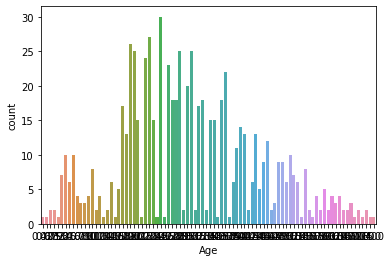

In [5]:
#Visualize the age of  passengers as bar chart ( age V/s count)
sns.countplot(x='Age',data=df)

In [6]:
#Average age of passengers
df.mean()['Age']

29.69911764705882

In [14]:
#Fill the missing values (with mean values) using fillna - in following columns  - age , Embarked ,Cabin
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode(),inplace=True)
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.000000,B96 B98,S
1,38.000000,C85,C
2,26.000000,G6,S
3,35.000000,C123,S
4,35.000000,NaN,S
...,...,...,...
886,27.000000,NaN,S
887,19.000000,B42,S
888,29.699118,NaN,S
889,26.000000,C148,C


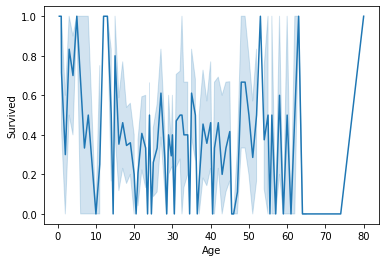

In [8]:
#Line Plot the  Age wise count of both Survived Population and Deceased Population
sns.lineplot(df['Age'],df['Survived'])

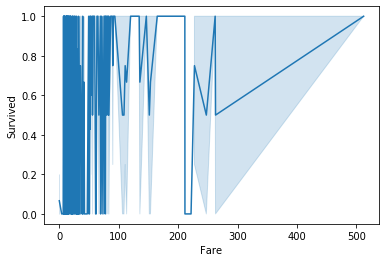

In [9]:
#Line Plot the  Fare wise count of both Survived Population and Deceased Population'
sns.lineplot(df['Fare'],df['Survived'])

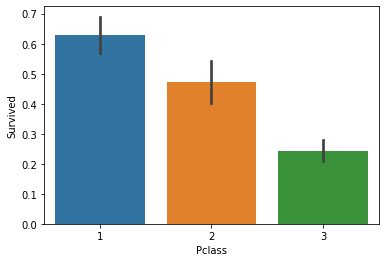

In [10]:
#Bar plot of Passenger Class of  Survived Population
sns.barplot(df['Pclass'],df['Survived'])

/home/futures/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


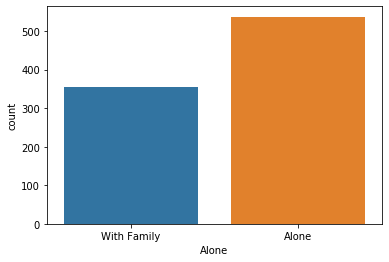

In [11]:
#Bar Plot of  Traveling Alone vs. With Family
#Adding a new column which will define the alone
df['Alone'] = df.Parch + df.SibSp
#if Alone>0, then that passenger had family aboard and wasn't alone.
#if Alone=0, passenger is alone
df['Alone'].loc[df['Alone']>0] ='With Family'
df['Alone'].loc[df['Alone']==0] = 'Alone'
sns.countplot(x='Alone',data=df)

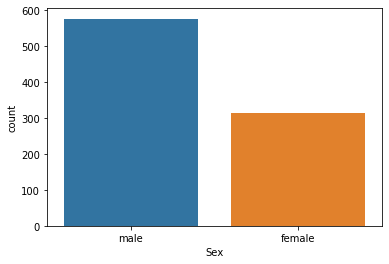

In [15]:
#Bar plot of Gender Variable 
sns.countplot(x='Sex',data=df)